# Fundamentos em Data Science

## Aula 5 - Algoritmos de Ensemble

- Bagging
- Boosting
- Random Forests
- AdaBoost
- Stacking


Fábio Sato - <fabiosato@gmail.com>

# Ensemble

Meta algoritmos que combinam várias técnicas de aprendizado de máquina em um único modelo preditivo

Possibilita obter um desempenho preditivo melhor do que o obtido por um modelo único

Objetivo: melhorar a predição de um modelo base (classificador ou regressor)



# Ensemble

<img src="figuras/ensemble-learning.png" alt="Ensemble Learning" style="width: 600px;"/>

# Ensemble - Tipos de Métodos

Os métodos de ensemble podem ser divididos em dois grupos principais:

- Sequencial
- Paralelo

# Ensemble - Métodos Sequenciais

Modelos base são gerados sequencialmente

Explora a **DEPENDÊNCIA** entre os modelos base

O desempenho global pode ser melhorado atribuindo pesos maiores a exemplos classificados erroneamente pelo modelo anterior


# Ensemble - Métodos Paralelos

Modelos base são gerados em paralelo

Explorar a **INDEPENDÊNCIA** entre os modelos base

Erros podem ser reduzidos drasticamente através da média

# Ensemble - Homogêneo x Heterogêneo

**Homogêneo**: A maioria dos métodos de ensemble utilizam um algoritmo base de aprendizado
para produzir modelos do mesmo tipo

**Heterogêneo**: Existem alguns métodos que utilizam algoritmos heterogêneos (de diferentes tipos)

Para que os métodos baseados em ensemble apresentem maior acurácia do que qualquer
um de seus membros individuais, os modelos de base devem ser o mais precisos e **DIVERSOS** possíveis

# Ensemble - Bagging

Bagging: *Boostrap Aggregation*

Redução da variância nas estimativas através da agregação (média) de múltiplas estimativas

Treina algoritmos em diferentes subconjuntos de dados

As bases de treinamento para cada modelo base são geradas através de amostragem aleatória com reposição 

Para agregar as saídas dos modelos base, bagging utiliza o **voto** para classificação e **média** para regressão

# Ensemble - Bagging

$$ f(x) = \frac{1}{M}\sum_{m=1}^{M}{f_{m}(x)} $$

# Ensemble - Bagging: Exemplo

In [1]:
!pip install mlxtend

You are using pip version 7.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 8)

In [3]:
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [4]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=3)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=100, 
                             max_samples=0.3, max_features=0.8)

bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=100, 
                             max_samples=0.3, max_features=0.8)

In [5]:
label = ['Decision Tree', 'k-NN', 'Bagging Tree', 'Bagging k-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

Accuracy: 0.67 (+/- 0.03) [Decision Tree]
Accuracy: 0.73 (+/- 0.03) [k-NN]
Accuracy: 0.73 (+/- 0.04) [Bagging Tree]
Accuracy: 0.76 (+/- 0.06) [Bagging k-NN]


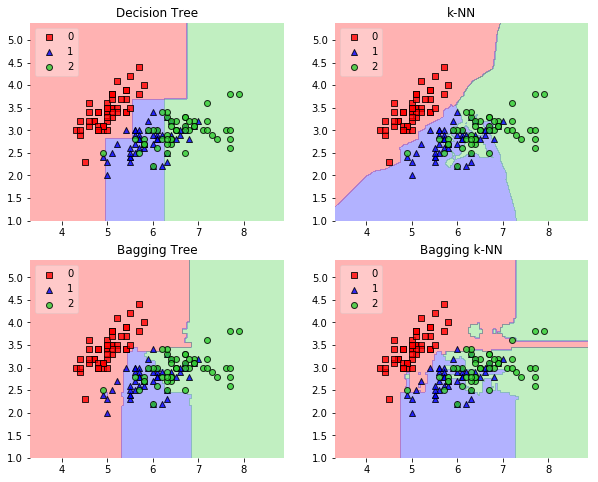

In [6]:
plt.show()

# Random Forests

Um exemplo bem comum de classe de algoritmo de ensemble são as florestas aleatórias de árvores (Random Forests)

Em Random Forests, cada árvore é um ensemble construído a partir de uma amostra com substituição.

Além disso, ao invés de utilizar todas as características, um conjunto aleatório de características é selecionado
tornando o processo de criação de árvores ainda mais aleatório.

Como resultado, o viés da floresta cresce ligeiramente mas a variância diminui significativamente resultando em um modelo muito melhor.

# Random Forests

![Random Forests](figuras/random-forests.png)

# Random Forests - Exercício

Implemente um modelo baseado em Random Forests para a base de dados 'Boston House Prices'


<img src="figuras/boston1.png" alt="Ensemble Learning" style="height: 500px;"/>

In [7]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [8]:
boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
rf = RandomForestRegressor(max_depth=10, n_estimators=10)
rf.fit(boston.data, boston.target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
y_pred = rf.predict(boston.data)

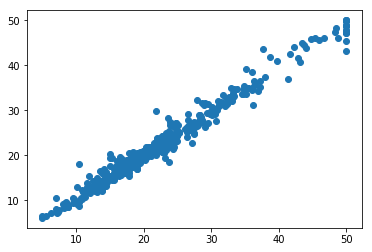

In [14]:
plt.scatter(boston.target, y_pred)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print('%.2f' % mean_squared_error(boston.target, y_pred))
print('%.2f' % r2_score(boston.target, y_pred))

2.24
0.97


[  3.21677097e-02   8.41340782e-04   8.96121378e-03   2.11566867e-04
   2.31108909e-02   4.75535099e-01   1.13174231e-02   6.25328370e-02
   3.54499657e-03   1.43623266e-02   1.43355808e-02   1.53191041e-02
   3.37759911e-01]


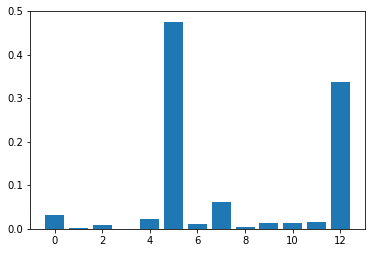

In [16]:
import numpy as np

importances = rf.feature_importances_

print(importances)
plt.bar(range(len(boston.feature_names)), importances)
plt.show()

# Ensemble - Boosting

Família de algoritmos que convertem classificadores fracos em algoritmos de aprendizado fortes.

Princípio fundamental: treinar uma sequência de classificadores fracos que são apenas um pouco melhores que adivinhar aleatoriamente (ex: pequenas árvores de decisão).

# Ensemble - Boosting

Os classificadores fracos são treinados em versões com peso ponderado dos dados. Mais peso é atribuído aos exemplos que foram classificadores errôneamente pelo modelo anterior.

As previsões são combinadas usando voto ponderado (classificação) ou soma ponderada (regressão) para produzir a estimativa final.

# Boosting - AdaBoost

Os classificadores fracos no AdaBoost são árvores de decisão com profundida igual a 1, chamados de *stumps* (tocos).

O AdaBoost pondera as observações, colocando mais peso na dificuldade de classificar exemplos e menos naqueles que já
são classificados corretamente.

Novos classificadores fracos são adicionados sequencialmente e focam seu treinamento nos padrões mais difíceis.

Exemplos que são difíceis de serem classificados recebem cada vez mais peso até que o algoritmo os classifiquem
corretamente.

# Boosting: AdaBoost

1. Atribua pesos uniformes ao vetor $w$ onde $ \sum_{i} {w_i} = 1 $
2. Para cada $j$ em $m$ rodadas de boosting, faça:
3. Treine um classificador fraco: $c_j = train(\mathbf{X}, \mathbf{y}, \mathbf{w})$
4. Estime as novas classes: $\mathbf{\widehat{y}} = predict(C_j, \mathbf{X})$
5. Calcule a taxa de erro ponderado: $ \epsilon = \mathbf{w} \cdot (\mathbf{\widehat{y}} == \mathbf{y})$
6. Calcule o coeficiente: $\alpha_{j} = 0.5  log \frac{1 - \epsilon}{\epsilon}$
7. Atualize os pesos: $ \mathbf{w} = \mathbf{w} \times exp(-\alpha_j \times \mathbf{\widehat{y}} \times \mathbf{y}) $ 
8. Normalize os pesos para que a soma seja 1: $ \mathbf{w} := \mathbf{w} / \sum_i {w_i}$
9. Realize as estimativas finais: $ \mathbf{\widehat{y}} = (\sum_{j=1}^{m}{(\alpha_j \times predict(C_j, \mathbf{X}})) > 0)$

Onde: $ (\mathbf{\hat{y}} == \mathbf{y}) $ no passo 5 se refere a vetores contendo 0s ou 1s, onde 1 é atribuído para estimativas corretas e 0 para erradas

# Boosting: Exemplo

In [17]:
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [18]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
    
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 6]
label = ['AdaBoost (n=1)', 'AdaBoost (n=2)', 'AdaBoost (n=3)', 
         'AdaBoost (n=10)']

In [19]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf, 
                                  n_estimators=n_est)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label)

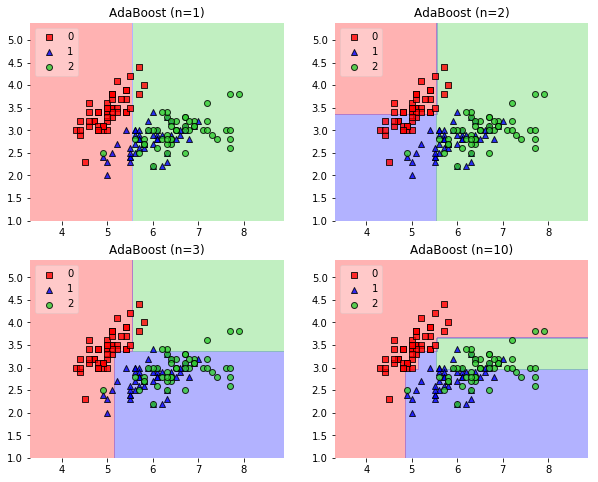

In [20]:
plt.show()

# Bagging vs Boosting: Bases

![Bagging vs Boosting](figuras/bagging-boosting-1.png)

# Bagging vs Boosting: Sequencial vs Paralelo
    
![Bagging vs Boosting](figuras/bagging-boosting-2.png)

# Bagging vs Boosting: Treinamento

![Bagging vs Boosting](figuras/bagging-boosting-3.png)

# Bagging vs Boosting: qual é o melhor?

Não há um vencedor: depende dos dados, da complexidade do problema e do algoritmo base

Bagging e Boosting reduzem a variância de uma estimativa única. Modelo com maior estabilidade.

Bagging raramente irá melhorar o viés de um modelo único com baixo desempenho. Entretanto pode gerar um modelo combinado com menores erros.

Se o problema do modelo único é o overfitting, então Bagging é a melhor opção. Boosting não ajuda a evitar/melhorar o overfitting.

# Stacking

Stacking é uma técnica de aprendizado por ensemble que combina múltiplos modelos de classificação
ou regressão através de um meta classificador ou meta regressor.

Os modelos de base são treinados em um conjunto completo da base de treinamento, e então o meta modelo utiliza as
saídas dos modelos de base como características de entrada.

A base geralmente utiliza diferentes algoritmos de aprendizado e portanto geralmente stacking se refere a
um modelo heterogêneos de ensemble

# Stacking

![Stacking](figuras/stacking.png)

# Stacking: Exemplo

In [25]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [26]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [27]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)


Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.91 (+/- 0.06) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [Stacking Classifier]


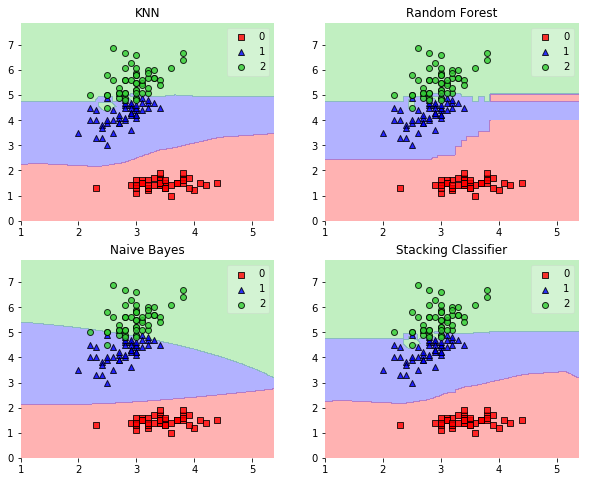

In [28]:
plt.show()

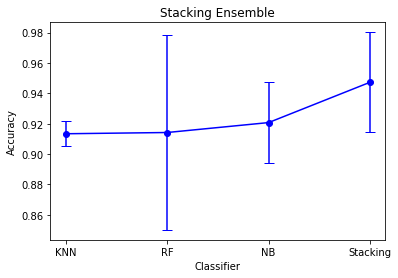

In [29]:
   plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

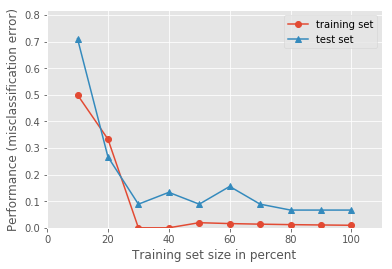

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()